# Machine Learning First Assignment
__Design and Develop:__ Mobin Nesari 99222107

## First Question:
Implement Linear Regression with Mean Absolute Error as the cost function from scratch. Compare your results with the Linear Regression module of Scikit-Learn.

In [6]:
import numpy as np

class LinearRegressionMAE:
    """
    Linear regression with Mean Absolute Error as the cost function.

    Parameters:
    -----------
        alpha : float, optional (default=0.01)
            Learning rate for the gradient descent algorithm.
        n_iters : int, optional (default=1000)
            Number of iterations for the gradient descent algorithm.

    Attributes:
    -----------
        weights : array-like, shape (n_features,)
            Coefficients for the linear regression model.
        bias : float
            Intercept for the linear regression model.

    Methods:
    --------
        fit(X, y)
            Fit linear regression model on the training data (X, y).
        predict(X)
            Predict output for the given input data X.
    """
    def __init__(self, alpha=0.01, n_iters=1000):
        self.alpha = alpha
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for i in range(self.n_iters):
            # Calculate predicted values using current weights and bias
            y_pred = self.predict(X)
            
            # Calculate error and cost (MAE)
            error = y - y_pred
            cost = np.mean(np.abs(error))
            
            # Update weights and bias using gradient descent
            d_weights = - (1/n_samples) * self.alpha * np.dot(X.T, error)
            d_bias = - (1/n_samples) * self.alpha * np.sum(error)
            
            self.weights -= d_weights
            self.bias -= d_bias
            
            if i % 100 == 0:
                print("Iteration {}: Cost = {}".format(i, cost))
                
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Comparison:

In [5]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate sample dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit our Linear Regression with MAE model
model_mae = LinearRegressionMAE()
model_mae.fit(X_train, y_train)

# Fit Scikit-Learn's Linear Regression model
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

# Make predictions on test data
y_pred_mae = model_mae.predict(X_test)
y_pred_sklearn = model_sklearn.predict(X_test)

# Evaluate performance using MSE and MAE metrics
mse_mae = mean_squared_error(y_test, y_pred_mae)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
mae_mae = mean_absolute_error(y_test, y_pred_mae)
mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)

print("MSE (MAE model): {}".format(mse_mae))
print("MSE (Scikit-Learn model): {}".format(mse_sklearn))
print("MAE (MAE model): {}".format(mae_mae))
print("MAE (Scikit-Learn model): {}".format(mae_sklearn))

Iteration 0: Cost = 105.09692470763795
Iteration 100: Cost = 39.869245399409756
Iteration 200: Cost = 15.574866353943854
Iteration 300: Cost = 6.229119414706385
Iteration 400: Cost = 2.5467111947638905
Iteration 500: Cost = 1.1045238898991032
Iteration 600: Cost = 0.578893501105281
Iteration 700: Cost = 0.42719925027653566
Iteration 800: Cost = 0.39541513659737576
Iteration 900: Cost = 0.38906517552102265
MSE (MAE model): 0.23610327111094276
MSE (Scikit-Learn model): 0.23779787276050032
MAE (MAE model): 0.3868685741904512
MAE (Scikit-Learn model): 0.3886664065048446


Diabetes Dataset Test:

In [8]:
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=42)

model_mae = LinearRegressionMAE()
model_mae.fit(X_train, y_train)

model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

y_pred_mae = model_mae.predict(X_test)
y_pred_sklearn = model_sklearn.predict(X_test)

mse_mae = mean_squared_error(y_test, y_pred_mae)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
mae_mae = mean_absolute_error(y_test, y_pred_mae)
mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)

print("MSE (MAE model): {}".format(mse_mae))
print("MSE (Scikit-Learn model): {}".format(mse_sklearn))
print("MAE (MAE model): {}".format(mae_mae))
print("MAE (Scikit-Learn model): {}".format(mae_sklearn))


Iteration 0: Cost = 153.73654390934846
Iteration 100: Cost = 73.99785136185469
Iteration 200: Cost = 65.6164772622652
Iteration 300: Cost = 65.14995593303861
Iteration 400: Cost = 65.3086284798265
Iteration 500: Cost = 65.29520140273702
Iteration 600: Cost = 65.17431838364038
Iteration 700: Cost = 65.00786693634821
Iteration 800: Cost = 64.82741862531441
Iteration 900: Cost = 64.64293986185689
MSE (MAE model): 5010.353588276721
MSE (Scikit-Learn model): 2900.1936284934804
MAE (MAE model): 61.87251702194067
MAE (Scikit-Learn model): 42.79409467959994


## Second Question:
Implement Linear Regression using the normal equation as the training algorithm from scratch.

To fulfil this question, I've used $\theta = (X^T X)^{-1} X^T y$.

In [9]:
class LinearRegressionNormalEquation:
    def fit(self, X, y):
        """
        Fit linear regression model to the training data.

        Parameters
        ----------
            X : numpy.ndarray
                Training input data of shape (n_samples, n_features).
            y : numpy.ndarray
                Target values of shape (n_samples,).

        Returns
        -------
            None
        """
        X = np.insert(X, 0, 1, axis=1) # add bias term
        X_transpose = np.transpose(X)
        XtX = np.dot(X_transpose, X)
        XtX_inv = np.linalg.inv(XtX)
        XtY = np.dot(X_transpose, y)
        self.theta = np.dot(XtX_inv, XtY)

    def predict(self, X):
        """
        Predict target values for the given input data.

        Parameters
        ----------
            X : numpy.ndarray
                Input data of shape (n_samples, n_features).

        Returns
        -------
            numpy.ndarray
                Predicted target values of shape (n_samples,).
        """
        X = np.insert(X, 0, 1, axis=1) # add bias term
        return np.dot(X, self.theta)


In [48]:
model_normal_equation = LinearRegressionNormalEquation()
model_normal_equation.fit(X_train, y_train)
y_pred_normal = model_normal_equation.predict(X_test)
mse_normal = mean_squared_error(y_test, y_pred_normal)
mae_normal = mean_absolute_error(y_test, y_pred_normal)
print("MSE (Normal Equation): {}".format(mse_normal))
print("MAE (Normal Equation): {}".format(mae_normal))

MSE (Normal Equation): 0.2377978727605158
MAE (Normal Equation): 0.3886664065048583


Diabetes Dataset:

In [11]:
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=42)

model_normal_equation = LinearRegressionNormalEquation()
model_normal_equation.fit(X_train, y_train)
y_pred_normal = model_normal_equation.predict(X_test)
mse_normal = mean_squared_error(y_test, y_pred_normal)
mae_normal = mean_absolute_error(y_test, y_pred_normal)
print("Diabetes Dataset Results:")
print("MSE (Normal Equation): {}".format(mse_normal))
print("MAE (Normal Equation): {}".format(mae_normal))

Diabetes Dataset Results:
MSE (Normal Equation): 2900.193628493482
MAE (Normal Equation): 42.79409467959994


## Third Question:
Implement Forward and Backward feature selection algorithm from scratch with MSE as the metric.

In [61]:
class ForwardFeatureSelection:
    
    def __init__(self, estimator, k_features):
        """
        Initialize the ForwardFeatureSelection class with an estimator and a specified number of features.
        
        Parameters:
            estimator (object): An object with fit and predict methods.
            k_features (int): Number of features to select.
        """
        self.estimator = estimator
        self.k_features = k_features
        
    def fit(self, X, y):
        """
        Select the specified number of features that give the lowest mean squared error (MSE) using forward feature selection.
        
        Parameters:
            X (array-like): Array of shape (n_samples, n_features) containing the training input samples.
            y (array-like): Array of shape (n_samples,) containing the target values.
        
        Returns:
            mse (list): List containing the MSE for each number of selected features.
            selected_features (list): List of the selected feature indices.
        """
        
        n_features = X.shape[1]
        self.selected_features = []
        mse = []
        
        for i in range(self.k_features):
            best_mse = float('inf')
            best_feature = None
            
            # Loop through all features to find the one that results in the lowest MSE
            for feature in range(n_features):
                if feature not in self.selected_features:
                    # Combine the already selected features with the current feature
                    features = self.selected_features + [feature]
                    X_train = X.iloc[:, features]
                    self.estimator.fit(X_train, y)
                    error = self.estimator.predict(X_train) - y
                    current_mse = np.mean(np.square(error))
                    
                    if current_mse < best_mse:
                        best_mse = current_mse
                        best_feature = feature
            
            # Add the best feature to the list of selected features
            self.selected_features.append(best_feature)
            mse.append(best_mse)
            
        return mse, self.selected_features
    

In [63]:
class BackwardFeatureElimination:
    
    def __init__(self, estimator, k_features):
        """
        Constructor for the class.

        Parameters:
            estimator (object) : An instance of a regression model.
            k_features (int) : The number of features to select.
        """
        self.estimator = estimator
        self.k_features = k_features
        
    def fit(self, X, y):
        """
        Fits the estimator with the feature subset that minimizes the MSE 
        after recursively eliminating the worst feature until k_features are reached.

        Parameters:
            X (numpy array) : The input features.
            y (numpy array) : The target variable.

        Returns:
            mse (list) : The MSE for each subset of features.
            selected_features (list) : The list of selected feature indices.
        """
        n_features = X.shape[1]
        self.selected_features = list(range(n_features))
        mse = []
        
        for i in range(n_features - self.k_features):
            best_mse = float('inf')
            worst_feature = None
            
            for feature in self.selected_features:
                features = self.selected_features.copy()
                features.remove(feature)
                X_train = X.iloc[:, features]
                self.estimator.fit(X_train, y)
                error = self.estimator.predict(X_train) - y
                current_mse = np.mean(np.square(error))
                
                if current_mse < best_mse:
                    best_mse = current_mse
                    worst_feature = feature
            
            self.selected_features.remove(worst_feature)
            mse.append(best_mse)
            
        return mse, self.selected_features

In [54]:
test_model = LinearRegressionNormalEquation()
forward_feature_selection = ForwardFeatureSelection(test_model, 8)
mse1, selected_features1 = forward_feature_selection.fit(X_train, y_train)
print("MSEs : {}".format(mse1))
print("Selected features : {}".format(selected_features1))

MSEs : [11839.210351375605, 7010.59167349197, 3249.5044065452576, 2237.6410604819143, 1199.7807128043805, 254.22520933883982, 163.41948867107624, 82.46806217104935]
Selected features : [3, 6, 9, 0, 1, 2, 5, 7]


In [55]:
test_model = LinearRegressionNormalEquation()
backward_feature_elimination = BackwardFeatureElimination(test_model, 8)
mse2, selected_features2 = backward_feature_elimination.fit(X_train, y_train)
print("MSEs : {}".format(mse2))
print("Selected features : {}".format(selected_features2))

MSEs : [29.221246783611747, 82.46806217104935]
Selected features : [0, 1, 2, 3, 5, 6, 7, 9]


In [56]:
print (set(selected_features1) == set(selected_features2))

True


## Forth Question

Implement batch gradient descent with early stopping for softmax regression from scratch. Use it on a classification task on the Penguins dataset.

### Import required libraries 

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [37]:
df = pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Dataset information

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [39]:
print(df.shape)

(344, 7)


In [40]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


#### Statistical Information

In [41]:
print("Attributes Covariance:")
df.cov()

Attributes Covariance:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [42]:
print('Attributes Correlation:')
df.corr()

Attributes Correlation:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<AxesSubplot:>

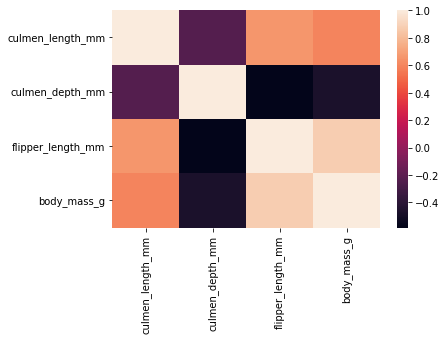

In [43]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

#### Missing Values

In [44]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [45]:
missing= missing_values_table(df)
missing

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,10,2.9
culmen_length_mm,2,0.6
culmen_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


In [46]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "most_frequent")
df.iloc[:,:] = imputer.fit_transform(df)

In [47]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### Convert sex attribute to integer values

In [48]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df["sex"] = lb.fit_transform(df["sex"])
df["sex"][:5]

0    2
1    1
2    1
3    2
4    1
Name: sex, dtype: int64

#### Dataset visualization

In [49]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

<AxesSubplot:>

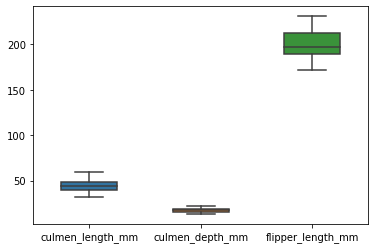

In [50]:
df1 = df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']]
sns.boxplot(data=df1, width=0.5,fliersize=5)

/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



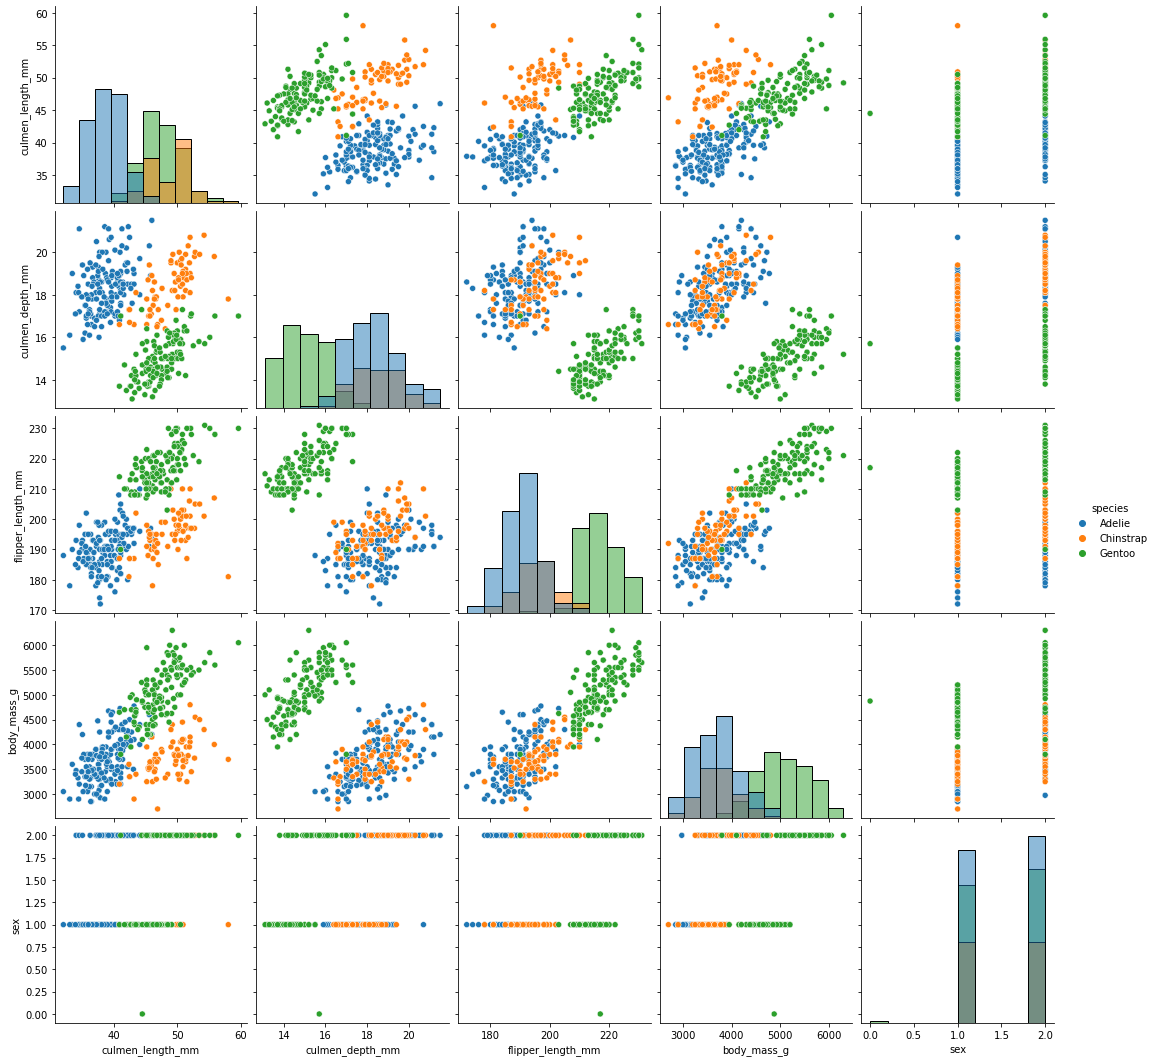

In [51]:
sns.pairplot(df, hue="species", size=3,diag_kind="hist")

/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



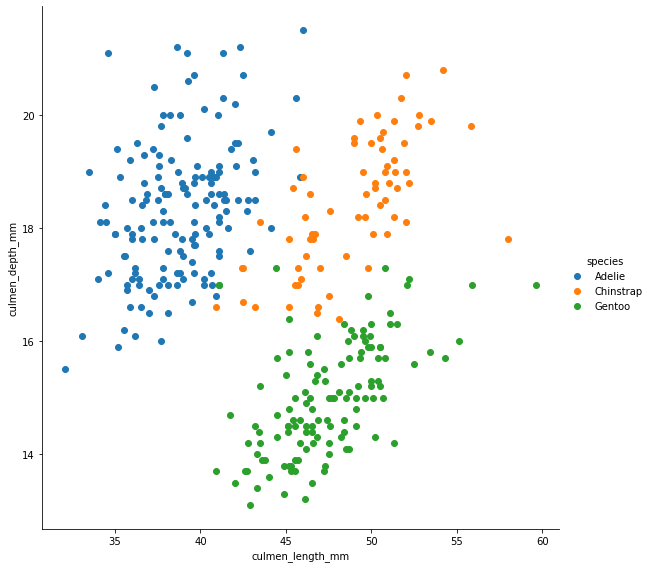

In [52]:
sns.FacetGrid(df, hue="species", size=8) \
   .map(plt.scatter, "culmen_length_mm", "culmen_depth_mm") \
   .add_legend()

/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



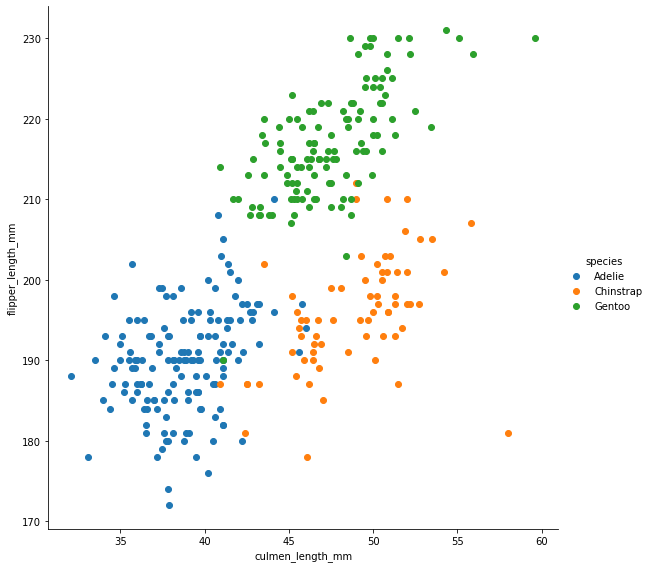

In [53]:
sns.FacetGrid(df, hue="species", size=8) \
   .map(plt.scatter, "culmen_length_mm", "flipper_length_mm") \
   .add_legend()

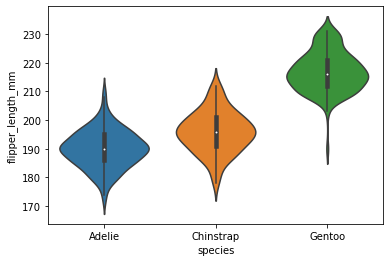

In [54]:
ax = sns.violinplot(x="species", y="flipper_length_mm", data=df,size=8)

/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



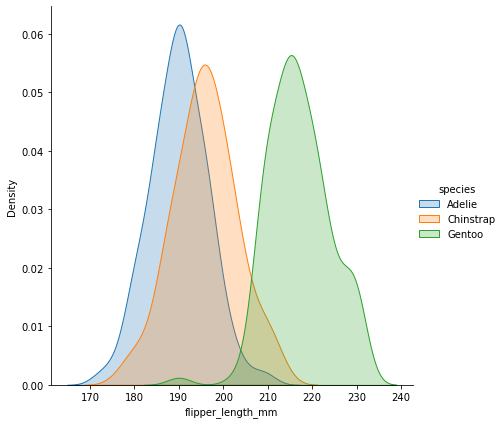

In [55]:
sns.FacetGrid(df, hue="species", size=6,) \
   .map(sns.kdeplot, "flipper_length_mm",shade=True) \
   .add_legend()

/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



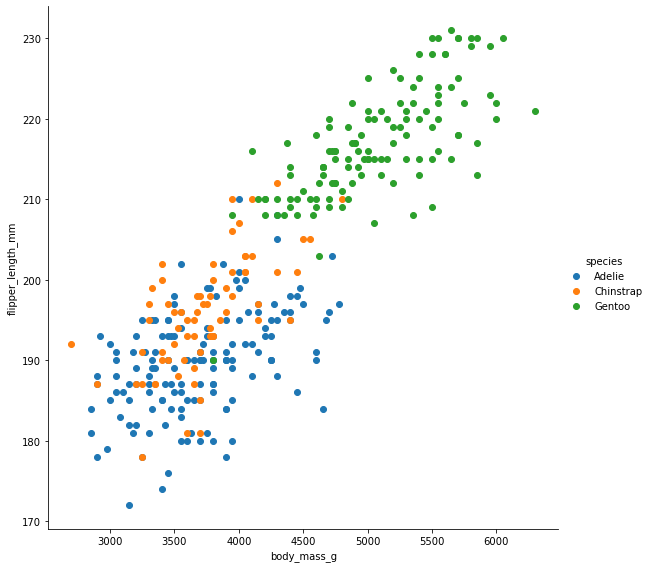

In [56]:
sns.FacetGrid(df, hue="species", size=8) \
   .map(plt.scatter, "body_mass_g", "flipper_length_mm") \
   .add_legend()


### Softmax Regression

In [65]:
X = df.loc[:, df.columns != "species"]
y = df["species"]

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =27)

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, max_epochs=1000, batch_size=32, patience=10, validation_split=0.2, verbose=False):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.batch_size = batch_size
        self.patience = patience
        self.validation_split = validation_split
        self.verbose = verbose

    def fit(self, X, y):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=self.validation_split)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)

        n_features = X_train.shape[1]
        n_classes = len(np.unique(y))

        # convert y_train and y_val to one-hot encoding
        y_train_one_hot = np.eye(n_classes)[y_train]
        y_val_one_hot = np.eye(n_classes)[y_val]

        # initialize weights and biases
        self.weights = np.random.randn(n_features, n_classes)
        self.biases = np.zeros((1, n_classes))

        # keep track of training and validation loss for each epoch
        train_loss_history = []
        val_loss_history = []

        # keep track of the best validation loss and the epoch it occurred
        best_val_loss = np.inf
        best_epoch = 0

        # keep track of the number of epochs since the last improvement in validation loss
        epochs_since_last_improvement = 0

        for epoch in range(self.max_epochs):
            # shuffle the training data and split into batches
            indices = np.arange(len(X_train))
            np.random.shuffle(indices)
            batches = np.array_split(indices, len(X_train) // self.batch_size)

            for batch_indices in batches:
                # forward pass
                X_batch = X_train[batch_indices]
                y_batch_one_hot = y_train_one_hot[batch_indices]
                z = np.dot(X_batch, self.weights) + self.biases
                exp_z = np.exp(z)
                sum_exp_z = np.sum(exp_z, axis=1, keepdims=True)
                softmax = exp_z / sum_exp_z

                # backward pass
                dL_dz = softmax - y_batch_one_hot
                dL_dW = np.dot(X_batch.T, dL_dz)
                dL_db = np.sum(dL_dz, axis=0, keepdims=True)

                # update weights and biases
                self.weights -= self.learning_rate * dL_dW
                self.biases -= self.learning_rate * dL_db

            # compute training and validation loss for the epoch
            train_loss = self.compute_loss(X_train, y_train_one_hot)
            val_loss = self.compute_loss(X_val, y_val_one_hot)
            train_loss_history.append(train_loss)
            val_loss_history.append(val_loss)

            if self.verbose:
                print(f"Epoch {epoch+1}: train_loss={train_loss:.4f}, val_loss={val_loss:.4f}")

            # check if validation loss has improved
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_epoch = epoch
                epochs_since_last_improvement = 0
            else:
                epochs_since_last_improvement += 1

            # check if we've reached the patience limit
            if epochs_since_last_improvement >= self.patience:
                if self.verbose:
                    print(f"Stopping early at epoch {epoch+1} with val_loss={val_loss:.4f}")
                break

        # plot training and validation loss
        plt.plot(train_loss_history, label="training loss")
        plt.plot(val_loss_history, label="validation loss")
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.legend()
        plt.show()

    def predict(self, X):
        X = StandardScaler().fit_transform(X)
        z = np.dot(X, self.weights) + self.biases
        exp_z = np.exp(z)
        sum_exp_z = np.sum(exp_z, axis=1, keepdims=True)
        softmax = exp_z / sum_exp_z
        return np.argmax(softmax, axis=1)

    def compute_loss(self, X, y_one_hot):
        z = np.dot(X, self.weights) + self.biases
        exp_z = np.exp(z)
        sum_exp_z = np.sum(exp_z, axis=1, keepdims=True)
        softmax = exp_z / sum_exp_z
        cross_entropy = -np.mean(np.sum(y_one_hot * np.log(softmax), axis=1))
        return cross_entropy

Epoch 1: train_loss=0.3035, val_loss=0.2850
Epoch 2: train_loss=0.2000, val_loss=0.1818
Epoch 3: train_loss=0.1548, val_loss=0.1373
Epoch 4: train_loss=0.1292, val_loss=0.1121
Epoch 5: train_loss=0.1128, val_loss=0.0961
Epoch 6: train_loss=0.1012, val_loss=0.0849
Epoch 7: train_loss=0.0927, val_loss=0.0766
Epoch 8: train_loss=0.0860, val_loss=0.0702
Epoch 9: train_loss=0.0807, val_loss=0.0652
Epoch 10: train_loss=0.0763, val_loss=0.0612
Epoch 11: train_loss=0.0726, val_loss=0.0575
Epoch 12: train_loss=0.0695, val_loss=0.0546
Epoch 13: train_loss=0.0668, val_loss=0.0519
Epoch 14: train_loss=0.0644, val_loss=0.0496
Epoch 15: train_loss=0.0623, val_loss=0.0476
Epoch 16: train_loss=0.0604, val_loss=0.0459
Epoch 17: train_loss=0.0587, val_loss=0.0444
Epoch 18: train_loss=0.0571, val_loss=0.0430
Epoch 19: train_loss=0.0557, val_loss=0.0416
Epoch 20: train_loss=0.0544, val_loss=0.0403
Epoch 21: train_loss=0.0532, val_loss=0.0393
Epoch 22: train_loss=0.0521, val_loss=0.0384
Epoch 23: train_los

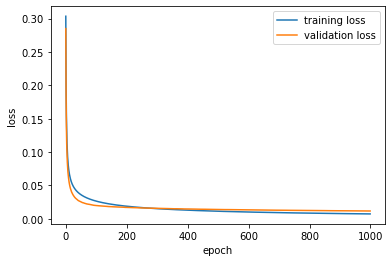

In [79]:
df["island"] = lb.fit_transform(df["island"])
df["species"] = lb.fit_transform(df["species"])
X = df.drop("species", axis = 1)
y = df["species"]
model = SoftmaxRegression(learning_rate=0.01, max_epochs=1000, batch_size=32, patience=10, validation_split=0.2, verbose=True)
model.fit(X, y)

## Fifth Question

In this part, you are going to work with the News Popularity Prediction dataset. You will implement a regression model using the Scikit-Learn package to predict the popularity of new articles (the number of times they will be shared online) based on about 60 features. You are expected:
* Perform exploratory data analysis on the dataset.
* Propose 5 different hypothesis tests related to the dataset. At least use 3 different tests. 
* Try Ridge and Lasso regression.
* Use various scaling methods and report their effects.
* Add polynomial features and report their effect.
* Try using GridSearchCV with RandomizedSearchCV to tune your model’s hyperparameters. (Extra Point)
* Apply the feature selection methods that you have implemented in the above sections.
* Get familiar with and implement the following loss functions from scratch and utilize them with a Linear Regression model and discuss their effect on the performance of the model. (Extra Point) 
    * Absolute Error
    * Epsilon-sensetive error
    * Huber 


#### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from scipy import stats

#### Load Data

In [2]:
df = pd.read_csv("NewsDataset.csv")
df.drop("url", axis=1, inplace=True)
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


#### Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    timedelta                      39644 non-null  float64
 1    n_tokens_title                 39644 non-null  float64
 2    n_tokens_content               39644 non-null  float64
 3    n_unique_tokens                39644 non-null  float64
 4    n_non_stop_words               39644 non-null  float64
 5    n_non_stop_unique_tokens       39644 non-null  float64
 6    num_hrefs                      39644 non-null  float64
 7    num_self_hrefs                 39644 non-null  float64
 8    num_imgs                       39644 non-null  float64
 9    num_videos                     39644 non-null  float64
 10   average_token_length           39644 non-null  float64
 11   num_keywords                   39644 non-null  float64
 12   data_channel_is_lifestyle      

In [4]:
print(df.shape)

(39644, 60)


In [5]:
df.describe(include='all')

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [23]:
df.describe(include='all').to_csv("description.csv")

#### Statistical Information

In [49]:
print("Attributes Covariance:")
df.cov()

Attributes Covariance:


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,4.586612e+04,-108.804750,-6.342897e+03,2.161108e+00,0.100075,2.660389,-2.019348,53.278379,-49.180292,0.823201,...,0.836536,5.215821,-0.013855,3.865397,-1.291679,-1.105422,2.200691,0.467018,-0.133043,2.156972e+04
n_tokens_title,-1.088047e+02,4.469152,1.808589e+01,-3.958305e-02,-0.052574,-0.037407,-1.281572,-0.121076,-0.155609,0.446888,...,-0.003779,-0.011347,-0.004616,-0.017886,0.002303,0.052949,0.000134,-0.058651,0.019399,2.158873e+02
n_tokens_content,-6.342897e+03,18.085895,2.219423e+05,-7.856418e+00,43.157231,0.574090,2258.574639,553.359433,1341.156023,200.681762,...,-8.785370,48.526849,-7.844984,-61.623303,10.148567,0.684925,2.921014,0.634679,1.432751,1.346919e+04
n_unique_tokens,2.161108e+00,-0.039583,-7.856418e+00,1.239539e+01,18.409751,11.492759,-0.173617,0.089857,0.550047,-0.008641,...,0.002308,-0.007899,0.000653,0.010120,-0.002456,-0.005340,-0.002181,-0.006143,-0.003359,3.300784e+01
n_non_stop_words,1.000747e-01,-0.052574,4.315723e+01,1.840975e+01,27.365777,17.071021,0.327289,0.274225,1.238256,-0.019323,...,0.000337,0.002672,-0.000917,-0.001843,-0.000380,-0.009141,-0.002292,-0.008405,-0.005199,2.694116e+01
n_non_stop_unique_tokens,2.660389e+00,-0.037407,5.740901e-01,1.149276e+01,17.071021,10.659026,-0.184374,0.095461,0.386044,-0.012910,...,0.001951,-0.001816,-0.000822,0.004092,-0.002089,-0.006203,-0.002522,-0.005284,-0.003947,4.333951e+00
num_hrefs,-2.019348e+00,-1.281572,2.258575e+03,-1.736165e-01,0.327289,-0.184374,128.414618,17.319627,32.263251,5.330857,...,-0.066404,0.805121,-0.220214,-0.867051,0.059386,0.161487,0.117439,0.020202,0.144952,5.982287e+03
num_self_hrefs,5.327838e+01,-0.121076,5.533594e+02,8.985659e-02,0.274225,0.095461,17.319627,14.862113,7.642879,1.226653,...,-0.019973,0.181423,-0.028668,-0.136610,0.014396,-0.014049,0.026836,0.006522,-0.005853,-8.518280e+01
num_imgs,-4.918029e+01,-0.155609,1.341156e+03,5.500467e-01,1.238256,0.386044,32.263251,7.642879,69.046685,-2.298446,...,-0.014627,0.319617,-0.076946,-0.329310,0.033795,0.153076,0.102149,-0.021585,0.119041,3.805369e+03
num_videos,8.232009e-01,0.446888,2.006818e+02,-8.641343e-03,-0.019323,-0.012910,5.330857,1.226653,-2.298446,16.874473,...,-0.002960,0.127904,-0.060850,-0.164788,0.010676,0.081287,0.023968,-0.017047,0.051342,1.143230e+03


<AxesSubplot:>

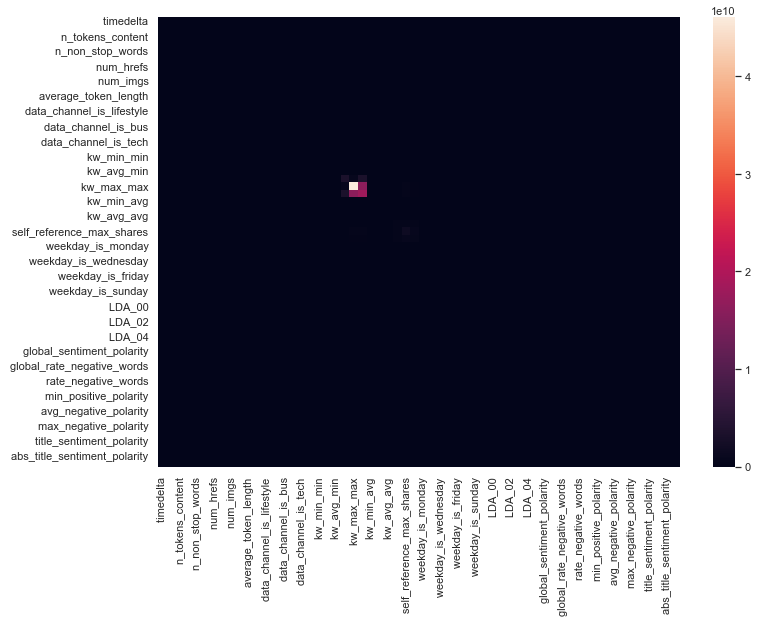

In [26]:
sns.set(rc={'figure.figsize' : (11.7, 8.27)})
sns.heatmap(df.cov())

In [50]:
print("Attributes Correlation:")
df.corr()

Attributes Correlation:


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936


<AxesSubplot:>

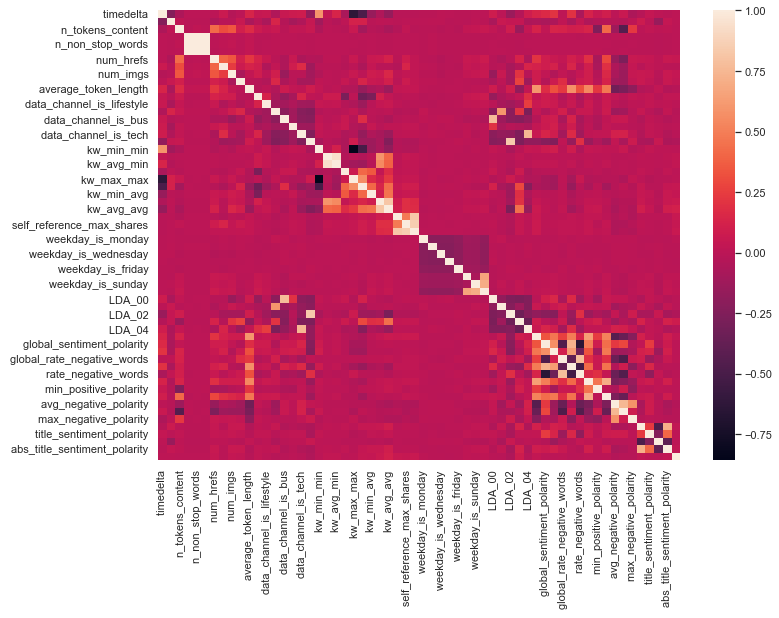

In [25]:
corr = df.corr()
sns.set(rc={'figure.figsize' : (11.7, 8.27)})
sns.heatmap(corr)

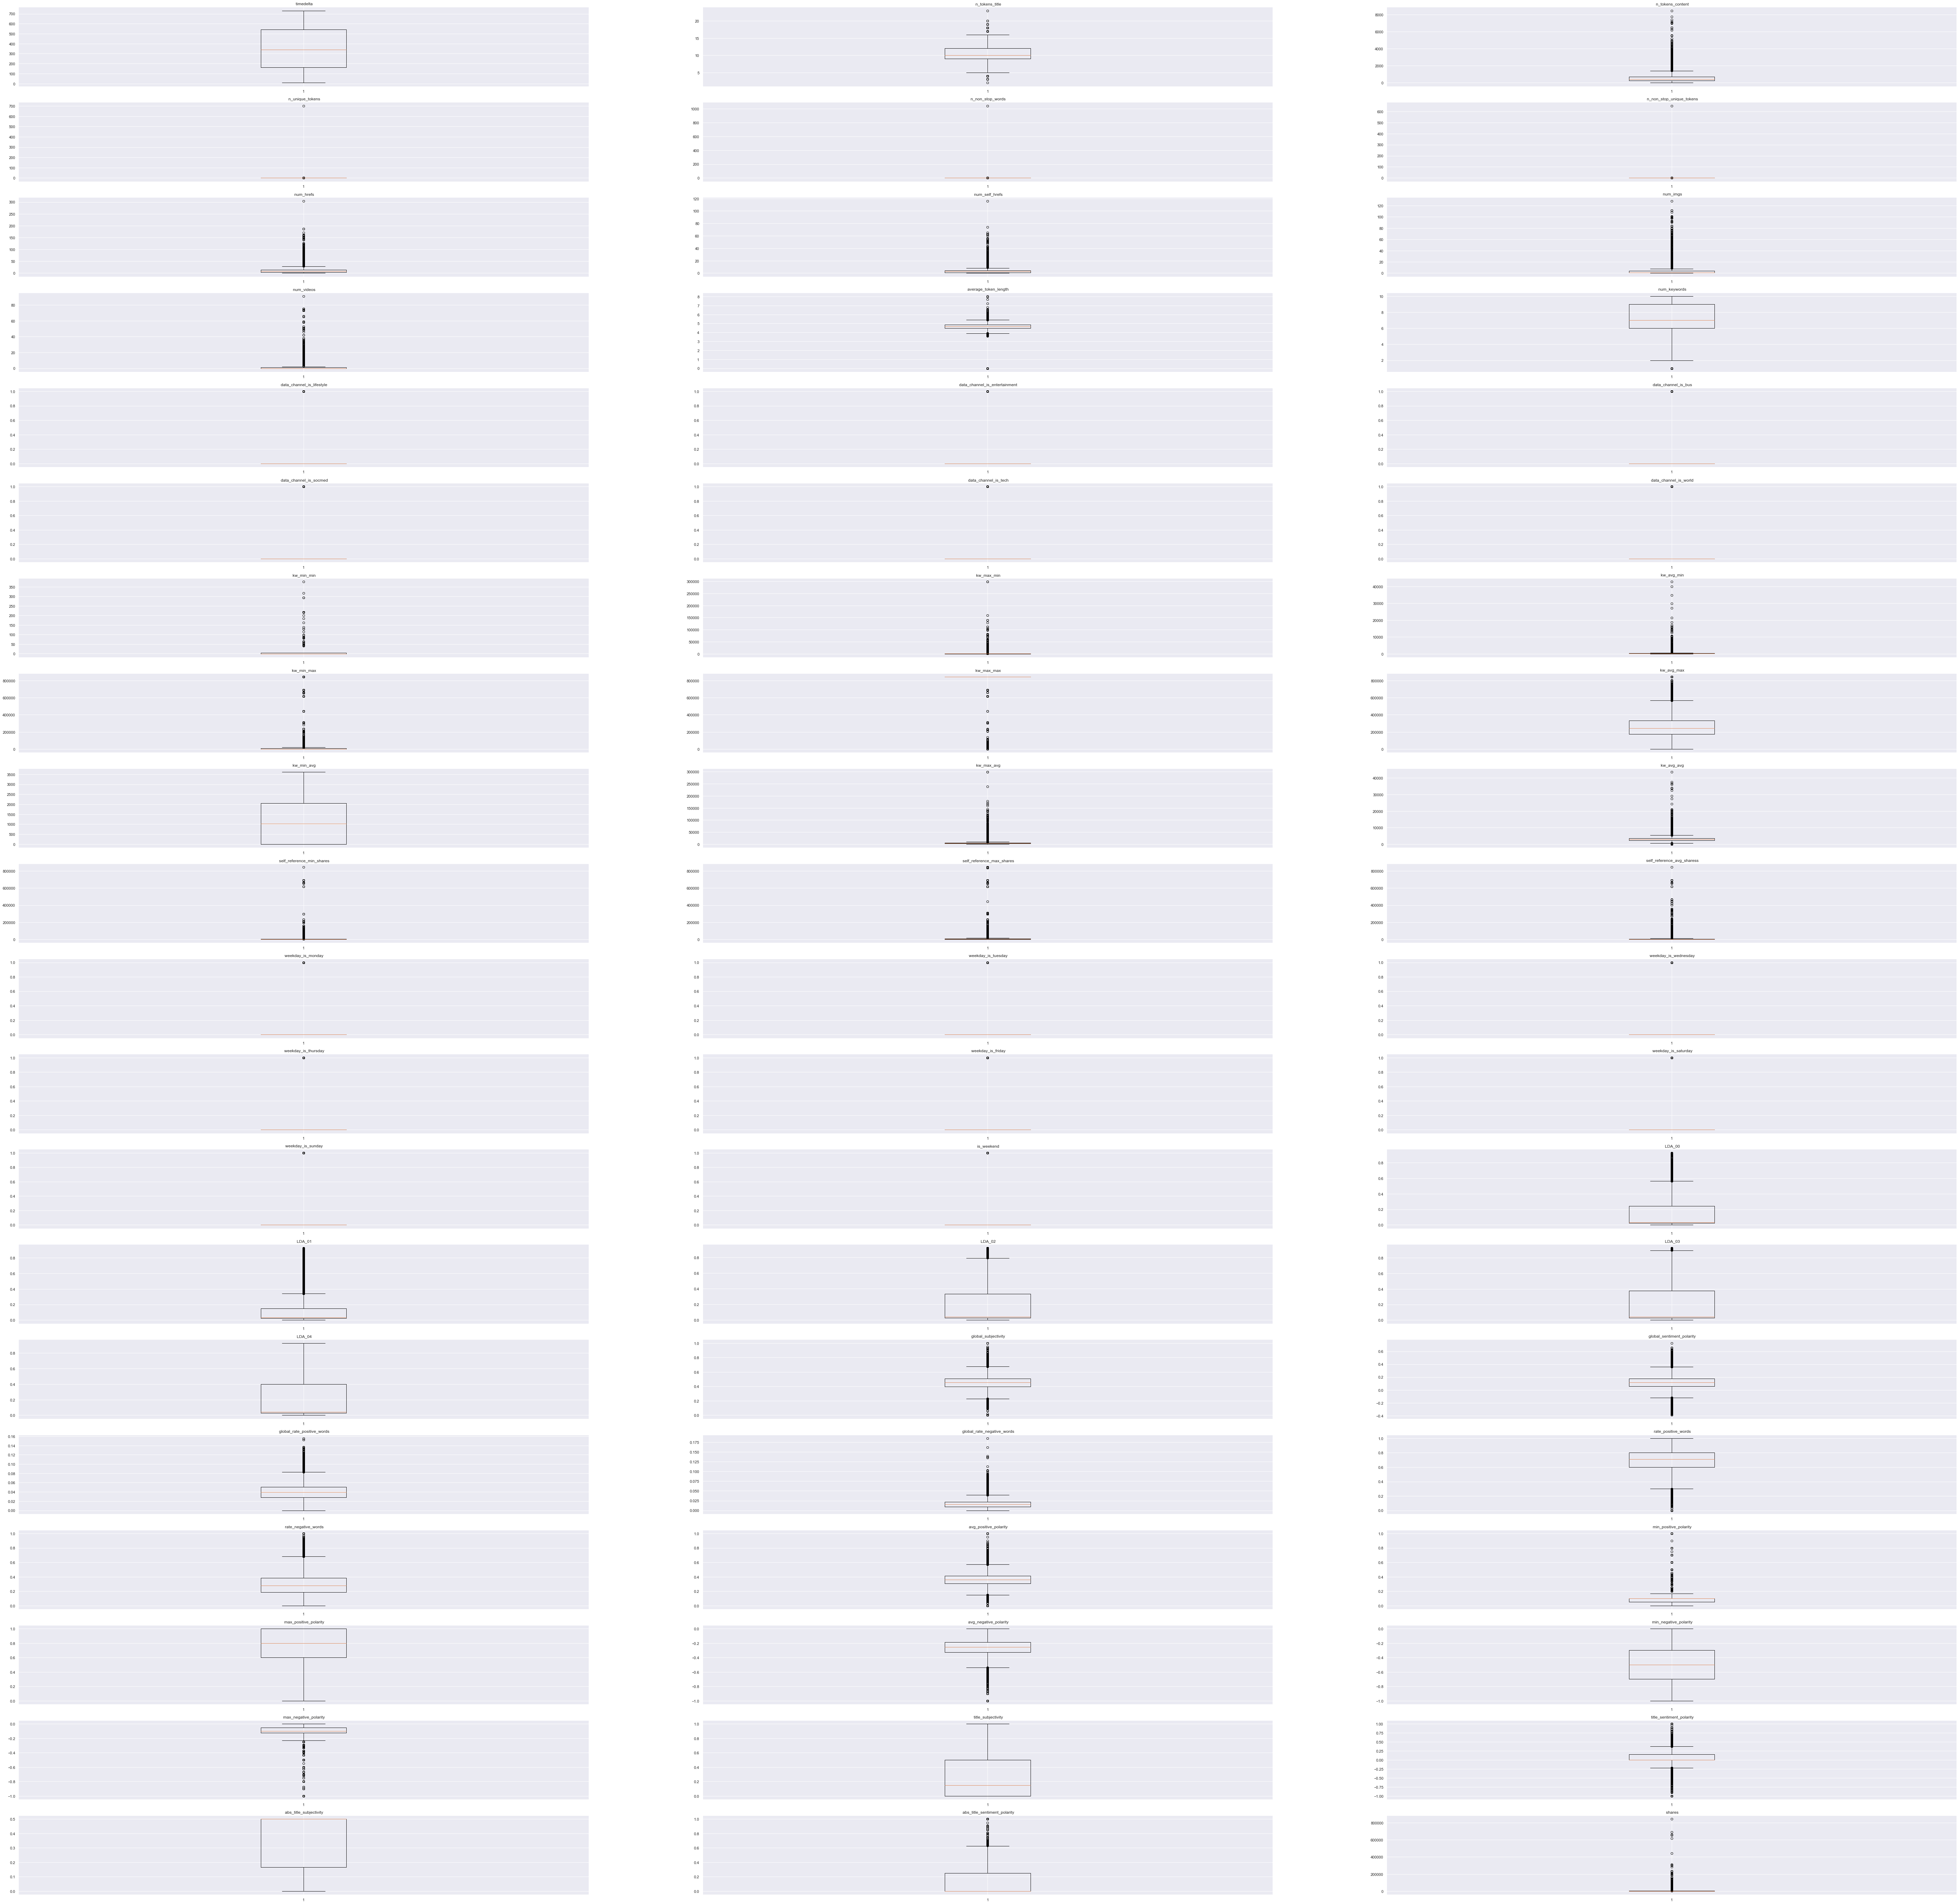

In [31]:
num_features = len(df.columns)
num_rows = int(np.ceil(num_features / 3))
num_cols = 3

fig, axs = plt.subplots(nrows = num_rows, ncols=num_cols, figsize=(100, 100))

axs = axs.flatten()

for i, feature in enumerate(df.columns):
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)

for j in range(num_features, num_rows * num_cols):
    fig.delaxes(axs[j])

plt.show()

#### Missing Values

In [52]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [53]:
missing = missing_values_table(df)
missing

Your selected dataframe has 60 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [54]:
df[" shares"].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

#### Lasso and Ridge Regression

In [6]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

X = df.drop(" shares", axis=1)
y = df[" shares"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ridge Regression

In [23]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.44623e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=0.1)

Lasso Regression

In [24]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.146e+12, tolerance: 4.402e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [25]:
ridge_score = ridge.score(X_test, y_test)
lasso_score = lasso.score(X_test, y_test)

print("Ridge R^2 score:", ridge_score)
print("Lasso R^2 score:", lasso_score)

Ridge R^2 score: 0.026440099586124144
Lasso R^2 score: 0.02624994565046479


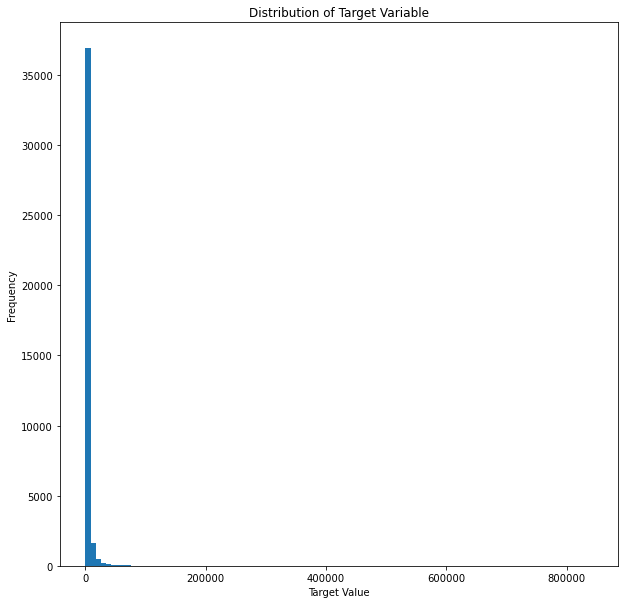

In [24]:
plt.hist(y, bins=100)
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.title("Distribution of Target Variable")
plt.show()

#### Various Scalers

##### StandardScaler

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standard_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standard_scaled, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

ridge_score = ridge.score(X_test, y_test)
lasso_score = lasso.score(X_test, y_test)

print("Ridge R^2 score:", ridge_score)
print("Lasso R^2 score:", lasso_score)

Ridge R^2 score: 0.02642553062749653
Lasso R^2 score: 0.0261961567112885


/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.578e+12, tolerance: 4.402e+08
  model = cd_fast.enet_coordinate_descent(


Lasso $R^2$ score has been decreased

##### MinMaxScaler

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_minmax_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_minmax_scaled, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

ridge_score = ridge.score(X_test, y_test)
lasso_score = lasso.score(X_test, y_test)

print("Ridge R^2 score:", ridge_score)
print("Lasso R^2 score:", lasso_score)

Ridge R^2 score: 0.026028738090140835
Lasso R^2 score: 0.026103662186888865


Both $R^2$ scores has been decreased

##### RobustScaler

In [28]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_robust_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_robust_scaled, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

ridge_score = ridge.score(X_test, y_test)
lasso_score = lasso.score(X_test, y_test)

print("Ridge R^2 score:", ridge_score)
print("Lasso R^2 score:", lasso_score)

/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.40096e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge R^2 score: 0.026433023488863783
Lasso R^2 score: 0.026211114854115647


/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.152e+12, tolerance: 4.402e+08
  model = cd_fast.enet_coordinate_descent(


#### Polynomial Features

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

ridge_score = ridge.score(X_test, y_test)
lasso_score = lasso.score(X_test, y_test)

print("Ridge R^2 score:", ridge_score)
print("Lasso R^2 score:", lasso_score)

Ridge R^2 score: -224.1651084003291
Lasso R^2 score: -0.015464410918393012


/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.006e+12, tolerance: 4.402e+08
  model = cd_fast.enet_coordinate_descent(


#### Hyperparameter Tuning

In [30]:
ridge_model = Ridge()
lasso_model = Lasso()

In [31]:
from scipy.stats import uniform

ridge_param_grid = {'alpha': uniform(0, 10)}
lasso_param_grid = {'alpha': uniform(0, 10), 'selection': ['cyclic', 'random']}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.model_selection import RandomizedSearchCV

ridge_random_search = RandomizedSearchCV(ridge_model, ridge_param_grid, n_iter=100, cv=5, random_state=42)
ridge_random_search.fit(X_train, y_train)

lasso_random_search = RandomizedSearchCV(lasso_model, lasso_param_grid, n_iter=100, cv=5, random_state=42)
lasso_random_search.fit(X_train, y_train)


/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.05946e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.0573e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.05592e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.09871e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/mo

RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9218008580>,
                                        'selection': ['cyclic', 'random']},
                   random_state=42)

In [33]:
best_ridge_model = Ridge(alpha=ridge_random_search.best_params_['alpha'])
best_lasso_model = Lasso(alpha=lasso_random_search.best_params_['alpha'], selection=lasso_random_search.best_params_['selection'])

best_ridge_model.fit(X_train, y_train)
best_lasso_model.fit(X_train, y_train)

ridge_test_score = best_ridge_model.score(X_test, y_test)
lasso_test_score = best_lasso_model.score(X_test, y_test)

print("Ridge test score:", ridge_test_score)
print("Lasso test score:", lasso_test_score)


Ridge test score: 0.02636540780595842
Lasso test score: 0.02671716207652819


#### Forward/Backward Feature Selection

In [65]:
ridge_model = Ridge(alpha=0.1)

forward_ridge_selection = ForwardFeatureSelection(ridge_model, 35)
backward_ridge_selection = BackwardFeatureElimination(ridge_model, 35)

mse1, features1 = forward_ridge_selection.fit(X_train, y_train)
mse2, features2 = backward_ridge_selection.fit(X_train, y_train)

print("Forward MSE:{}".format(mse1))
print("Forward Selected Features: {}".format(features1))
print("Backward MSE:{}".format(mse2))
print("Backward Selected Features: {}".format(features2))


/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.44826e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.44623e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.44664e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/mobinnesari/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.44624e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/m

Forward MSE:[137227425.57161966, 136956866.29288197, 136731390.61990047, 136583960.30962014, 136456217.8861468, 136329330.55896798, 136256711.2753034, 136210016.12262502, 136136410.5183893, 136106766.216831, 136077023.8250518, 136049131.28139877, 136020727.8526984, 135998462.82533866, 135973745.73375788, 135952682.61084852, 135932183.38602796, 135913694.1155063, 135897277.14041275, 135866707.67579788, 135851674.97056353, 135837151.19034725, 135824481.93669164, 135812289.90057153, 135802079.40845966, 135783654.48155424, 135773686.5654431, 135767050.1127704, 135759528.72180125, 135754553.90179965, 135749817.36521882, 135745716.28919384, 135741951.3300775, 135735212.93341264, 135730247.8017909]
Forward Selected Features: [26, 25, 24, 0, 27, 6, 1, 13, 41, 40, 2, 21, 7, 30, 35, 14, 28, 54, 10, 43, 45, 50, 19, 12, 58, 57, 20, 11, 16, 33, 22, 29, 38, 15, 17]
Backward MSE:[135698562.43796286, 135698562.4361288, 135698562.43440783, 135698705.501225, 135698959.64649138, 135699257.0520923, 135699

#### Different Loss Functions

##### Huber Loss Function:
The Huber loss function is a commonly used loss function in robust regression, which is a type of regression analysis that is less sensitive to outliers than ordinary least squares (OLS) regression. In the context of linear regression, the Huber loss function is used as a cost function to minimize when fitting a linear model to data.

The effect of using the Huber loss function instead of the traditional mean squared error (MSE) loss function in linear regression is that it produces a model that is more robust to outliers in the data. The MSE loss function gives equal weight to all errors, regardless of how large or small they are, which can lead to a model that is overly influenced by outliers. In contrast, the Huber loss function gives smaller weights to large errors and larger weights to small errors, resulting in a model that is less sensitive to outliers.

In [36]:
def huber_loss(y_true, y_pred, delta=1.0):
    """
    Huber loss function for robust regression.
    
    Parameters:
        - y_true (numpy array): true values
        - y_pred (numpy array): predicted values
        - delta (float): threshold parameter
        
    Returns:
        - loss (float): Huber loss
    
    """
    error = y_true - y_pred
    abs_error = np.abs(error)
    quadratic_part = np.minimum(abs_error, delta)
    linear_part = abs_error - quadratic_part
    loss = 0.5 * quadratic_part ** 2 + delta * linear_part
    
    return np.mean(loss)

In [38]:
y_pred = best_ridge_model.predict(X_test)
print("Ridge Huber Loss: {}".format(huber_loss(y_pred, y_test)))

y_pred = best_lasso_model.predict(X_test)
print("Lasso Huber Loss: {}".format(huber_loss(y_pred, y_test)))

Ridge Huber Loss: 3003.6033405248204
Lasso Huber Loss: 3001.346109509593


##### Epsilon-Sensitive Error:
The epsilon-sensitive error function is a commonly used loss function in support vector regression (SVR), which is a type of regression analysis that uses support vector machines (SVMs) to fit linear or nonlinear models to data. In the context of linear regression, the epsilon-sensitive error function is used as a cost function to minimize when fitting a linear model to data.

The effect of using the epsilon-sensitive error function instead of the traditional mean squared error (MSE) loss function in linear regression is that it produces a model that is more robust to outliers in the data. The MSE loss function gives equal weight to all errors, regardless of how large or small they are, which can lead to a model that is overly influenced by outliers. In contrast, the epsilon-sensitive error function gives smaller weights to errors that fall within a margin of tolerance (defined by the hyperparameter `epsilon`) and larger weights to errors that fall outside this margin, resulting in a model that is less sensitive to outliers.

In [39]:
def epsilon_sensitive_error(y_true, y_pred, epsilon=1.0):
    """
    Epsilon-sensitive error function for support vector regression.
    
    Parameters:
        - y_true (numpy array): true values
        - y_pred (numpy array): predicted values
        - epsilon (float): threshold parameter
        
    Returns:
        - error (float): epsilon-sensitive error
    
    """
    diff = np.abs(y_true - y_pred)
    error = np.where(diff <= epsilon, 0, diff - epsilon)
    
    return error.mean()

In [43]:
y_pred = best_ridge_model.predict(X_test)
print("Ridge Epsilon-Sensitive Loss: {}".format(epsilon_sensitive_error(y_pred, y_test)))

y_pred = best_lasso_model.predict(X_test)
print("Lasso Epsilon-Sensitive Loss: {}".format(epsilon_sensitive_error(y_pred, y_test)))

Ridge Epsilon-Sensitive Loss: 3003.1033405248236
Lasso Epsilon-Sensitive Loss: 3000.8461935898513


##### Absolute Error:

In [41]:
def absolute_error(y_true, y_pred):
    """
    Absolute error function for linear regression.
    
    Parameters:
        - y_true (numpy array): true values
        - y_pred (numpy array): predicted values
        
    Returns:
        - error (float): absolute error
    
    """
    diff = np.abs(y_true - y_pred)
    error = diff.mean()
    
    return error


In [44]:
y_pred = best_ridge_model.predict(X_test)
print("Ridge Absolute Loss: {}".format(absolute_error(y_pred, y_test)))

y_pred = best_lasso_model.predict(X_test)
print("Lasso Absolute Loss: {}".format(absolute_error(y_pred, y_test)))

Ridge Absolute Loss: 3004.1033405248204
Lasso Absolute Loss: 3001.8460808592263


#### Dimension Reduction (2 components)

##### PCA:

Explained Variance Ratio (PCA):  [0.76282388 0.16383036]
Transformed Data (PCA): 
 [[ 791448.52013582   84416.86766098]
 [ 791459.1104701    84389.35132371]
 [ 791439.50865048   84440.26321053]
 ...
 [ -97369.01742149   -8849.93537603]
 [ -79679.47811247  -46222.13172928]
 [-135373.45617641  111055.91089775]]


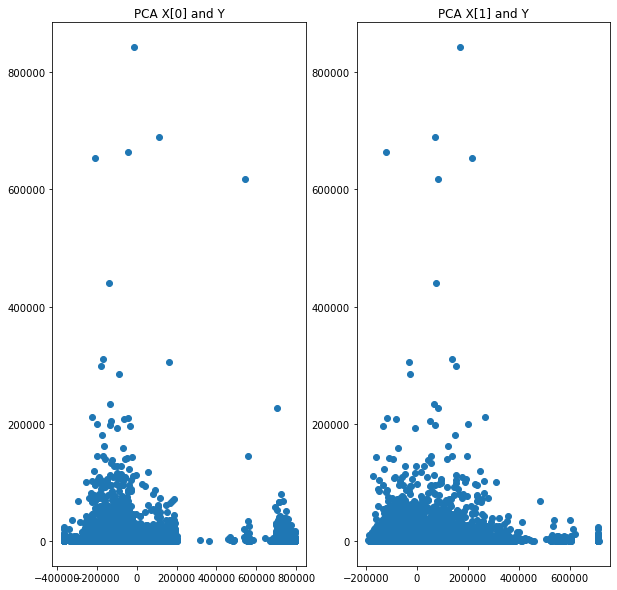

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Explained Variance Ratio (PCA): ", pca.explained_variance_ratio_)
print("Transformed Data (PCA): \n", X_pca)

plt.rcParams['figure.figsize'] = [10, 10]
figure, axis = plt.subplots(1, 2)

axis[0].scatter(X_pca[:, 0], y)
axis[0].set_title("PCA X[0] and Y")

axis[1].scatter(X_pca[:, 1], y)
axis[1].set_title("PCA X[1] and Y")


plt.show()

##### LDA:

Explained Variance Ratio (LDA):  [0.09052116 0.03975743]
Transformed Data (LDA): 
 [[ 2.59422071  0.2303238 ]
 [ 2.06656932  0.28582873]
 [ 1.71289828  0.38471817]
 ...
 [-0.66482242  0.08991837]
 [ 1.95664183  0.01076973]
 [ 1.43431376 -0.27889452]]


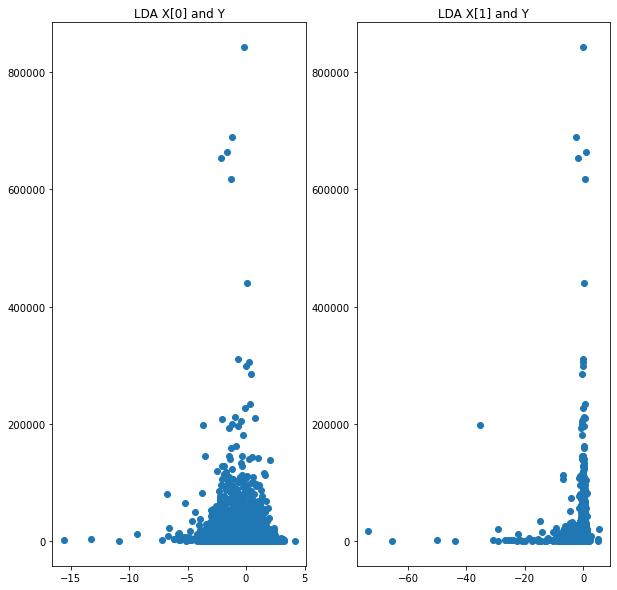

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

print("Explained Variance Ratio (LDA): ", lda.explained_variance_ratio_)
print("Transformed Data (LDA): \n", X_lda)

plt.rcParams['figure.figsize'] = [10, 10]
figure, axis = plt.subplots(1, 2)

axis[0].scatter(X_lda[:, 0], y)
axis[0].set_title("LDA X[0] and Y")

axis[1].scatter(X_lda[:, 1], y)
axis[1].set_title("LDA X[1] and Y")


plt.show()

#### Hypothesis Tests:

One Sample t-test:

$H_0$: Mean of number of videos is 2

In [69]:
t_stat, p_value = stats.ttest_1samp(X[' num_videos'], popmean=2)
print(f"t_stat: {t_stat}")
print(f"p_value: {p_value}")

t_stat: -36.35866334853325
p_value: 9.379576076005322e-285


Due to the small value of p_value, Our hypothesis has been approved

Two Sample t-test:

Tested whether the mean number of shares for news articles published on weekdays is significantly different from the mean number of shares for news articles published on weekends.

In [71]:
weekday_idx = (df[' weekday_is_monday'] == 1) | (df[' weekday_is_tuesday'] == 1) \
            | (df[' weekday_is_wednesday'] == 1) | (df[' weekday_is_thursday'] == 1) \
            | (df[' weekday_is_friday'] == 1)
weekend_idx = (df[' weekday_is_saturday'] == 1) | (df[' weekday_is_sunday'] == 1)
t_stat, p_value = stats.ttest_ind(df.loc[weekday_idx, ' shares'], df.loc[weekend_idx, ' shares'])
print("\nTwo-sample t-test:")
print("t-statistic =", t_stat)
print("p-value =", p_value)


Two-sample t-test:
t-statistic = -3.3769109636398382
p-value = 0.0007337519086551708


Chi-Square Test of Independence:

Tested whether there is a significant association between popularity (shares >= 1400 vs shares < 1400) and the number of tokens in the content of news articles (binned into six categories).


In [72]:
df[' is_popular'] = (df[' shares'] >= 1400).astype(int)
bins = pd.cut(df[' n_tokens_content'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000])
contingency_table = pd.crosstab(df[' is_popular'], bins)
_, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("\nChi-square test of independence:")
print("p-value =", p_value)


Chi-square test of independence:
p-value = 7.669051149803969e-15


ANOVA Test:

We tested whether there are significant differences in the mean number of shares among news articles with different numbers of images (0, 1, 2, 3, or 4+)

In [78]:
df[' num_imgs'] = df[' num_imgs'].fillna(0).astype(int)
f_stat, p_value = stats.f_oneway(df.loc[df[' num_imgs'] == 0, ' shares'],
                                 df.loc[df[' num_imgs'] == 1, ' shares'],
                                 df.loc[df[' num_imgs'] == 2, ' shares'],
                                 df.loc[df[' num_imgs'] == 3, ' shares'],
                                 df.loc[df[' num_imgs'] >= 4, ' shares'])
print("\nANOVA:")
print("F-statistic =", f_stat)
print("p-value =", p_value)


ANOVA:
F-statistic = 59.73191816753038
p-value = 2.2465770280430067e-50


Pearson's Correlation Coefficient Test:

Tested whether there is a significant linear relationship between the number of tokens in the title and the number of tokens in the content of news articles.

In [79]:
# Pearson's correlation coefficient test
corr_coeff, p_value = stats.pearsonr(df[' n_tokens_title'], df[' n_tokens_content'])
print("\nPearson's correlation coefficient test:")
print("correlation coefficient =", corr_coeff)
print("p-value =", p_value)


Pearson's correlation coefficient test:
correlation coefficient = 0.01815964824729636
p-value = 0.00029928791899879473
